In [217]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Visualización estadística
import matplotlib.pyplot as plt
from dotenv import dotenv_values,load_dotenv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os

In [218]:
ENV = dotenv_values(".env")
load_dotenv(override=False)

True

In [219]:
#Cargar el dataset
df = pd.read_csv(os.environ['DATASETS_PATH']+'/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [220]:
df.head(10) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [221]:
#convertir valores 
labels = []
for value in df['Species']:
    if value == 'Iris-setosa':
        labels.append(0)
    elif value == 'Iris-versicolor':
        labels.append(1)
    else:
        labels.append(2)
df.loc[:, 'target'] = labels

In [222]:
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
#debe ser formato numpy array
X = df[col_names]
X = X.values
print(type(X))
#debe ser formato list
y = df.target
y = y.values.tolist()
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


# Información general del dataFrame


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   target         150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


# Eliminando una columna no necesaria

In [226]:
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df = df[col_names]
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [159]:
Iris_setosa = df[(df['Species']=='Iris-setosa')]
Iris_versicolor = df[(df['Species']=='Iris-versicolor')]
Iris_virginica = df[(df['Species']=='Iris-virginica')]
print('Iris-setosa: %i\nIris-versicolor: %i\nIris-virginica: %i'%(
    len(Iris_setosa),len(Iris_versicolor), len(Iris_virginica)))


Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


In [230]:
#convertir valores 
Iris_setosa = Iris_setosa.replace('Iris-setosa',0)
Iris_versicolor = Iris_versicolor.replace('Iris-versicolor',1)
Iris_virginica = Iris_virginica.replace('Iris-virginica',2)
Iris_virginica.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [161]:
from scipy.stats import norm
dt=(Iris_setosa, Iris_versicolor,Iris_virginica)
list_std=[]
list_mean=[]
list_min_value=[]
list_max_value=[]
for data_frame in dt:
    list_std.append(list(data_frame.std()))
    list_mean.append(list(data_frame.mean()))
    list_min_value.append(list(data_frame.min()))
    list_max_value.append(list(data_frame.max()))
clases=list(df.Species.unique())
#Significa todas las filas y todas las columnas excepto la columna de índice 0 en el marco de datos
descriptores= list(data_frame)[:-1]
print(clases)
print(descriptores)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


# Longitud del Sépalo vs Especies:

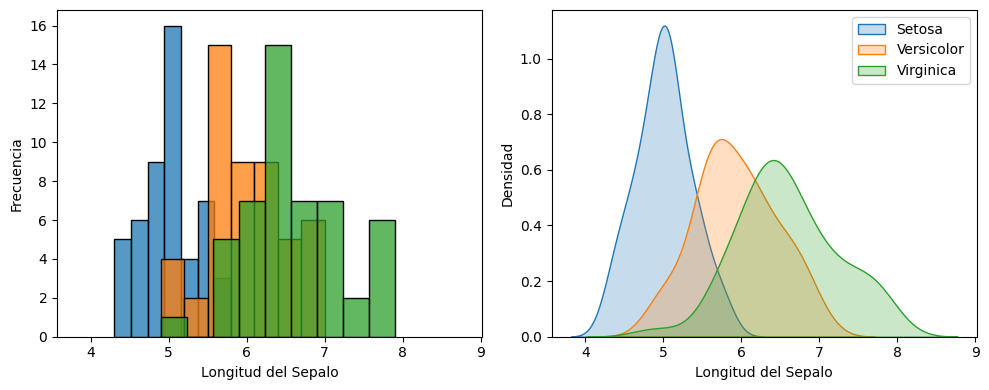

In [247]:
#Longitud del Sépalo vs Especies
var = 'SepalLengthCm'
var_title = 'Longitud del Sepalo'

filter = df['Species'] == 'Iris-setosa'
df_setosa = df.loc[filter]

filter = (df['Species'] == 'Iris-versicolor')
df_versicolor = df.loc[filter]

filter = (df['Species'] == 'Iris-virginica')
df_virginica = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()


#  Ancho del Sépalo vs Especies:

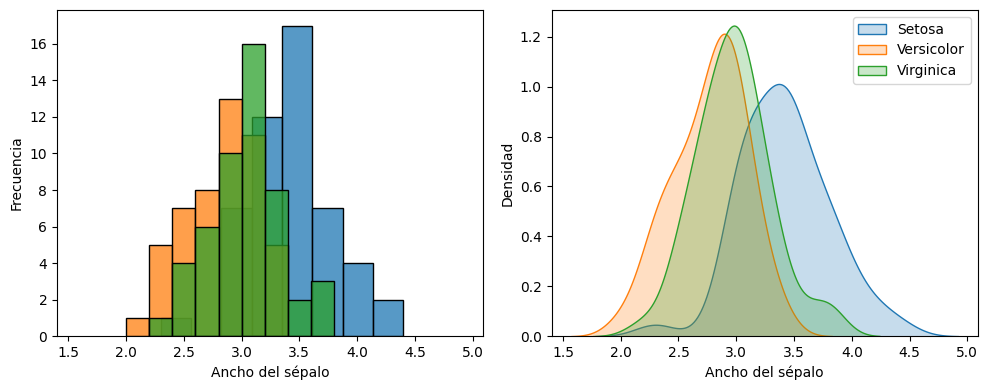

In [249]:
var = 'SepalWidthCm'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Longitud del Pétalo vs Especies

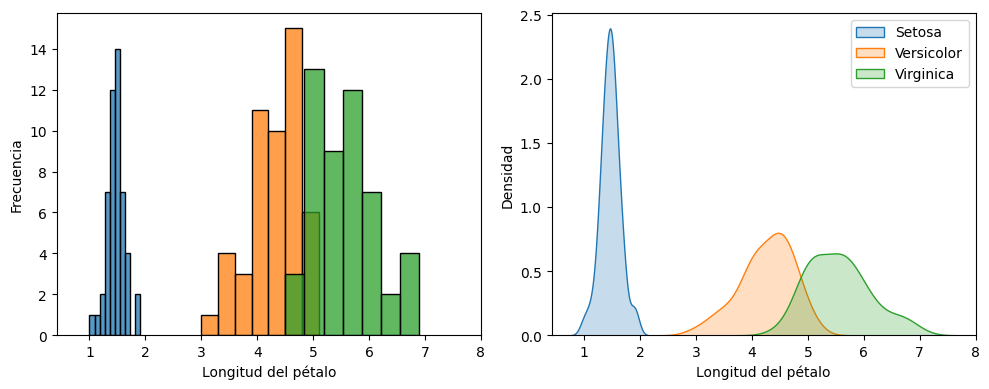

In [250]:
var = 'PetalLengthCm'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Ancho del Pétalo vs Especies

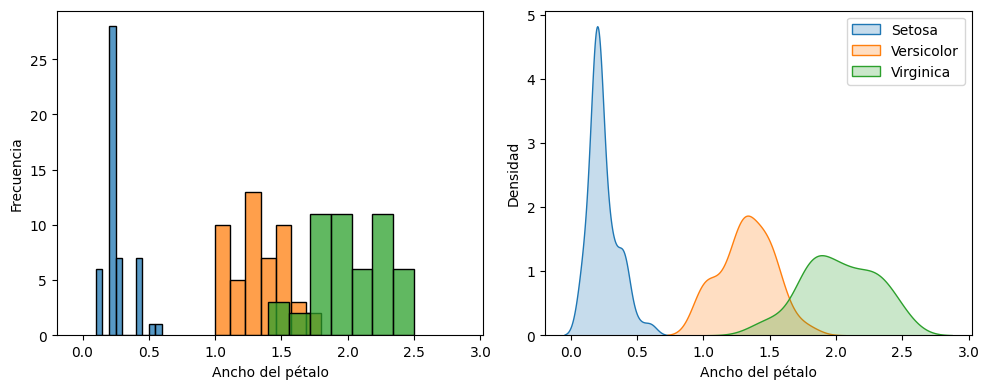

In [260]:
var = 'PetalWidthCm'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

#

# Correlación de las variables medidas (descriptores)

Al entrenar con cualquier algoritmo, la cantidad de características y su correlación juega un papel importante. Si hay características y muchas de las características están altamente correlacionadas, entonces el entrenamiento de un algoritmo con todas las características reducirá la precisión. Por lo tanto, la selección de características debe hacerse con cuidado.

A continuación se grafica como mapa de calor (heatmap) la matriz de correlación calculada con iris.corr().

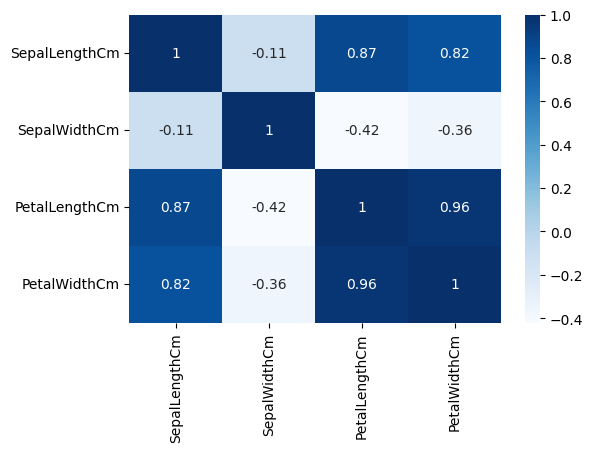

In [261]:
df_correlation = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_correlation.corr()

fig = plt.figure(figsize = (6,4))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

De la gráfica se puede apreciar que el ancho y la longitud de sépalo no están correlacionados, mientras que el ancho y la longitud del pétalo están altamente correlacionados.

In [270]:
# Dividir el conjunto de datos en entrenamiento y prueba 70% y 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [271]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [272]:
from sklearn import metrics #for checking the model accuracy
y_pred = clf.predict(X_test) 
print(type(y_test))
print(type(y_pred))
print('The accuracy of the GaussianNB is:',metrics.accuracy_score(y_pred,y_test))

<class 'list'>
<class 'numpy.ndarray'>
The accuracy of the GaussianNB is: 0.8666666666666667


In [279]:
#convertir valores 
labels = []
for value in df['Species']:
    if value == 'Iris-setosa':
        labels.append(0)
    elif value == 'Iris-versicolor':
        labels.append(1)
    else:
        labels.append(2)
df.loc[:, 'target'] = labels

col_names = ['PetalWidthCm','SepalLengthCm']
#debe ser formato numpy array
X = df[col_names]
X = X.values
print(type(X))
#debe ser formato list
y = df.target
y = y.values.tolist()
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [281]:
y_pred = clf.predict(X_test) 
print('The accuracy of the GaussianNB is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the GaussianNB is: 1.0
